# Проектное задание №1


**Описание проекта:**

Собрав базу текстовых отзывов за последние десятилетия, мы планируем создать модель на основе глубокого обучения, которая сможет предсказывать популярность конкретной игры по существующим текстам ревью и комментариев к играм с аналогичными составляющими элементами. Также мы ставим себе целью создание модели, предсказывающей ряд описательных характеристик, важных при аналитике.



Для вашего проекта решите указанные задачи, используя табличные данные. Вы можете решить эти задачи и для создания нового умного функционала продукта/сервиса, взяв и использовав открытые данные.


1. Проведите  **предобработку** (удаление дубликатов, удаление/замена пропущенных данных, удаление выбросов, замена типа) и **анализ данных** (визуализация, определение корреляций, построение корреляционной матрицы, группирование и агрегирование, оценка существования зависимостей между переменными).

2. Выберите целевую переменную и решите задачу **регрессии**, рассмотрев минимум **5 моделей** и определив минимум **3 метрики** работы моделей.

  Выберите лучшую модель. Для лучшей модели определите **значимость признаков**.
  
  Отбросив половину худших признаков, определите метрики работы модели без этих признаков.
  
  Подберите оптимальные параметры лучшей модели и определите метрики работы модели при этих значениях.
  
  Оцените качество работы лучшей моделей на основе кросс-валидации.
  
  Постройте кривые обучения (потерь) и оцените недообучение и переобучение.

3. Выберите целевую переменную и решите задачу **классификации**, рассмотрев минимум **5 моделей** и определив **4 метрики** работы моделей.

  Выберите лучшую модель. Подберите оптимальные параметры лучшей модели и определите метрики работы модели при этих значениях.

4. Решите задачу **уменьшения размерности** (неконтролируемое обучение). Используя модели из п.2 или п.3, оцените как уменьшение размерности повлияло на метрики работы модели.

5. Решите задачу **кластеризации**, используя минимум **3 модели**. Определите метрики кластеризации.

6. Опишите **внедрение** (потенциальное внедрение) полученных моделей и результатов в ваш проект, а также возможность **создания нового умного функционала** продукта/сервиса.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# предобработка
(удаление дубликатов, удаление/замена пропущенных данных, удаление выбросов, замена типа)

In [ ]:
df_origin = pd.read_csv('/content/Video_Games.csv')
df_origin.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10613 entries, 0 to 10612
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             10612 non-null  object 
 1   Platform         10613 non-null  object 
 2   Year_of_Release  10450 non-null  float64
 3   Genre            10612 non-null  object 
 4   Publisher        10581 non-null  object 
 5   NA_Sales         10613 non-null  float64
 6   EU_Sales         10613 non-null  float64
 7   JP_Sales         10613 non-null  float64
 8   Other_Sales      10613 non-null  float64
 9   Global_Sales     10613 non-null  float64
 10  Critic_Score     6001 non-null   float64
 11  Critic_Count     6001 non-null   float64
 12  User_Score       7065 non-null   object 
 13  User_Count       5803 non-null   float64
 14  Developer        7086 non-null   object 
 15  Rating           7044 non-null   object 
dtypes: float64(9), object(7)
memory usage: 1.3+ MB


In [ ]:
# Проверка наличия дубликатов
print("Количество дубликатов:", df_origin.duplicated().sum())


Количество дубликатов: 0


In [ ]:
# Проверка пропущенных данных
print(df_origin.isnull().sum())

Name                  1
Platform              0
Year_of_Release     163
Genre                 1
Publisher            32
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       4612
Critic_Count       4612
User_Score         3548
User_Count         4810
Developer          3527
Rating             3569
dtype: int64


In [ ]:
# Замена пропущенных значений в столбцах Name и Genre на "Unknown"
df_origin['Name'].fillna('Unknown', inplace=True)
df_origin['Genre'].fillna('Unknown', inplace=True)

# Замена пропущенных значений в столбце Year_of_Release на медианное значение года выпуска
median_year = df_origin['Year_of_Release'].median()
df_origin['Year_of_Release'].fillna(median_year, inplace=True)

# Замена пропущенных значений в столбце Publisher на "Unknown"
df_origin['Publisher'].fillna('Unknown', inplace=True)

# Заполнение пропущенных значений в числовых столбцах медианными значениями
df_origin['Critic_Score'].fillna(df_origin['Critic_Score'].median(), inplace=True)
df_origin['Critic_Count'].fillna(df_origin['Critic_Count'].median(), inplace=True)
df_origin['User_Count'].fillna(df_origin['User_Count'].median(), inplace=True)

# Замена пропущенных значений в столбце User_Score на медианное значение, если это возможно, иначе оставляем как есть
df_origin['User_Score'] = pd.to_numeric(df_origin['User_Score'], errors='coerce')
median_user_score = df_origin['User_Score'].median()
df_origin['User_Score'].fillna(median_user_score, inplace=True)

# Заполнение пропущенных значений в категориальном столбце Developer наиболее часто встречающимся значением
most_common_developer = df_origin['Developer'].mode()[0]
df_origin['Developer'].fillna(most_common_developer, inplace=True)

# Заполнение пропущенных значений в категориальном столбце Rating наиболее часто встречающимся значением
most_common_rating = df_origin['Rating'].mode()[0]
df_origin['Rating'].fillna(most_common_rating, inplace=True)



In [ ]:
# Проверка пропущенных данных
print(df_origin.isnull().sum())

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64


In [ ]:
# Замена типа данных для столбца "Year_of_Release" с float64 на int64
df_origin['Year_of_Release'] = df_origin['Year_of_Release'].astype('Int64')

# Замена типа данных для столбца "User_Score" с object на float64 (при условии, что '-' это пропущенные данные)
df_origin['User_Score'] = pd.to_numeric(df_origin['User_Score'], errors='coerce')

In [ ]:
# Преобразование столбца "User_Score" в числовой формат
df_origin['User_Score'] = pd.to_numeric(df_origin['User_Score'], errors='coerce')

# Применение кодирования категориальных признаков
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
categorical_columns = ['Name', 'Platform', 'Genre', 'Publisher', 'Developer']
for column in categorical_columns:
    df_origin[column] = label_encoder.fit_transform(df_origin[column].astype(str))

# Обработка отсутствующих значений в числовых столбцах
numeric_columns = ['Year_of_Release', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales',
                   'Critic_Score', 'Critic_Count', 'User_Score', 'User_Count']
for column in numeric_columns:
    df_origin[column].fillna(df_origin[column].mean(), inplace=True)

label_encoder = LabelEncoder()
df_origin['Rating'] = label_encoder.fit_transform(df_origin['Rating'].astype(str))

# Приведение всех столбцов к числовому типу
df_origin = df_origin.astype(float)


In [ ]:
df_origin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10613 entries, 0 to 10612
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             10613 non-null  float64
 1   Platform         10613 non-null  float64
 2   Year_of_Release  10613 non-null  float64
 3   Genre            10613 non-null  float64
 4   Publisher        10613 non-null  float64
 5   NA_Sales         10613 non-null  float64
 6   EU_Sales         10613 non-null  float64
 7   JP_Sales         10613 non-null  float64
 8   Other_Sales      10613 non-null  float64
 9   Global_Sales     10613 non-null  float64
 10  Critic_Score     10613 non-null  float64
 11  Critic_Count     10613 non-null  float64
 12  User_Score       10613 non-null  float64
 13  User_Count       10613 non-null  float64
 14  Developer        10613 non-null  float64
 15  Rating           10613 non-null  float64
dtypes: float64(16)
memory usage: 1.3 MB


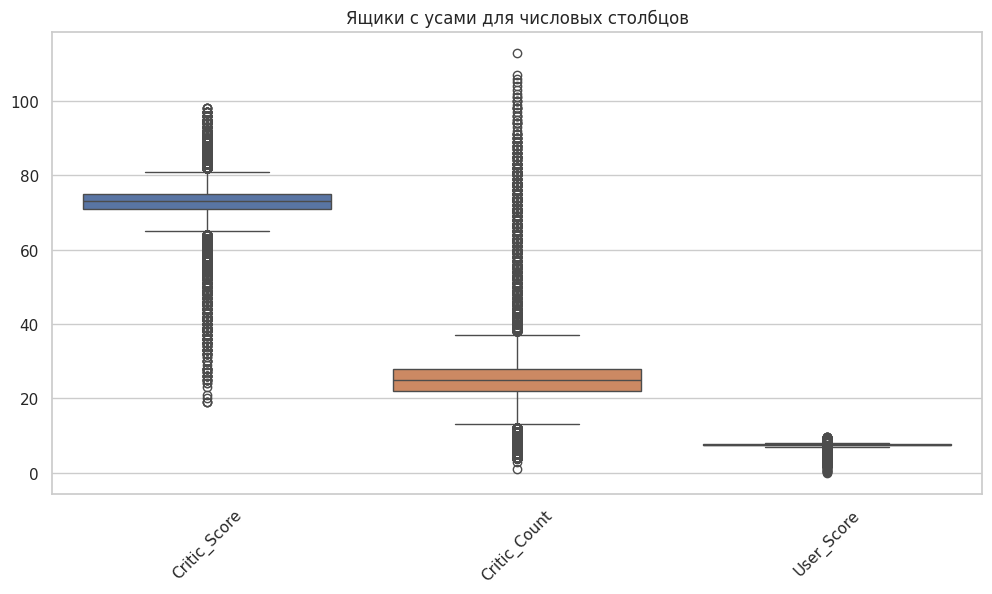

In [ ]:
# Указываем стиль графиков
sns.set(style="whitegrid")

# Создаем ящики с усами для числовых столбцов
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_origin[['Critic_Score', 'Critic_Count', 'User_Score']])
plt.title('Ящики с усами для числовых столбцов')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Вывод уникальных значений для категориальных столбцов
for col in ['Name', 'Platform', 'Genre', 'Publisher']:
    print(f"Уникальные значения в столбце '{col}':")
    print(df_origin[col].unique())
    print()


Уникальные значения в столбце 'Name':
[6946. 5841. 3451. ... 2431. 6686. 3350.]

Уникальные значения в столбце 'Platform':
[23.  9.  4.  3. 25. 14. 13. 20.  5. 15.  1.  8. 12. 26. 11.  0. 16. 27.
 24.  6.  7.  2. 17. 18. 19. 22. 10. 21.]

Уникальные значения в столбце 'Genre':
[10.  4.  6.  7.  5.  3.  8.  9.  0.  2.  1. 11. 12.]

Уникальные значения в столбце 'Publisher':
[215. 193. 310. 279.  13. 329.  42.  91. 273. 290.  32.   2.  57. 111.
 165. 288. 281. 344. 171. 348. 333.  90. 257. 345.  95. 208. 233. 132.
 304. 103.   9. 173.  85. 334.  61. 177. 255. 168.  26. 195. 153.  81.
 204.   5. 327. 237. 183. 148. 312.   8. 338. 197. 151. 286. 337.  41.
 135.  72.  15. 227. 256. 342. 123. 124. 349. 127.  68. 139.  63. 259.
 303.   7.  10. 359. 283.   1. 209. 251.  19.  46. 284. 101. 225. 358.
 248.  60.  94. 295.  64. 262.  33. 180. 277. 307.  18. 192. 241. 110.
 321. 269. 164. 114. 320. 178. 121. 198.  56. 311.  69. 289. 363. 239.
 264. 249. 252. 330. 152. 270. 202.  59. 287.   0. 138. 

In [ ]:
# Создание функции для определения выбросов на основе стандартного отклонения
def detect_outliers_std(series):
    std = np.std(series)
    mean = np.mean(series)
    threshold = 3 * std
    lower_bound = mean - threshold
    upper_bound = mean + threshold
    outliers = series[(series < lower_bound) | (series > upper_bound)]
    return outliers

# Применение функции к числовым столбцам и вывод выбросов
numeric_columns = df_origin.select_dtypes(include=['float64', 'Int64']).columns
for col in numeric_columns:
    outliers = detect_outliers_std(df_origin[col])
    print(f"Выбросы в столбце '{col}': {outliers.tolist()}")


Выбросы в столбце 'Name': []
Выбросы в столбце 'Platform': []
Выбросы в столбце 'Year_of_Release': [1985.0, 1984.0, 1982.0, 1986.0, 1981.0, 1987.0, 1980.0, 1984.0, 1984.0, 1985.0, 1983.0, 1986.0, 1987.0, 1980.0, 1986.0, 1986.0, 1987.0, 1986.0, 1987.0, 1983.0, 1981.0, 1986.0, 1984.0, 1987.0, 1983.0, 1981.0, 1981.0, 1985.0, 1986.0, 1984.0, 1986.0, 1981.0, 1982.0, 1986.0, 1981.0, 1982.0, 1984.0, 1984.0, 1986.0, 1985.0, 1981.0, 1984.0, 1987.0, 1986.0, 1981.0, 1985.0, 1983.0, 1981.0, 1984.0, 1987.0, 1986.0, 1984.0, 1986.0, 1986.0, 1982.0, 1980.0, 1986.0, 1986.0, 1983.0, 1982.0, 1983.0, 1981.0, 1982.0, 1984.0, 1983.0, 1982.0, 1981.0, 1980.0, 1985.0, 1986.0, 1985.0, 1985.0, 1981.0, 1986.0, 1981.0, 1987.0, 1985.0, 1982.0, 1987.0, 1984.0, 1981.0, 1987.0, 1981.0, 1982.0, 1983.0, 1982.0, 1981.0, 1980.0, 1983.0, 1981.0, 1982.0, 1981.0, 1984.0, 1981.0, 1982.0, 1987.0, 1982.0, 1982.0, 1982.0, 1981.0, 1981.0, 1982.0, 1986.0, 1982.0, 1982.0, 1982.0, 1985.0, 1983.0, 1982.0, 1982.0, 1981.0, 1982.0, 1980

In [ ]:
# Сохранение измененного датасета в CSV файл
df_origin.to_csv("Video_Games_Preprocessed.csv", index=False)


In [ ]:
df = pd.read_csv('Video_Games_Preprocessed.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,6946.0,23.0,2006.0,10.0,215.0,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,739.0,1.0
1,5841.0,9.0,1985.0,4.0,215.0,29.08,3.58,6.81,0.77,40.24,73.0,25.0,7.5,29.0,333.0,1.0
2,3451.0,23.0,2008.0,6.0,215.0,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,739.0,1.0
3,6948.0,23.0,2009.0,10.0,215.0,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,739.0,1.0
4,4620.0,4.0,1996.0,7.0,215.0,11.27,8.89,10.22,1.00,31.37,73.0,25.0,7.5,29.0,333.0,1.0


# анализ данных
(визуализация, определение корреляций, построение корреляционной матрицы, группирование и агрегирование, оценка существования зависимостей между переменными).

In [ ]:
df = pd.read_csv('Video_Games_Preprocessed.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,6946.0,23.0,2006.0,10.0,215.0,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,739.0,1.0
1,5841.0,9.0,1985.0,4.0,215.0,29.08,3.58,6.81,0.77,40.24,73.0,25.0,7.5,29.0,333.0,1.0
2,3451.0,23.0,2008.0,6.0,215.0,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,739.0,1.0
3,6948.0,23.0,2009.0,10.0,215.0,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,739.0,1.0
4,4620.0,4.0,1996.0,7.0,215.0,11.27,8.89,10.22,1.00,31.37,73.0,25.0,7.5,29.0,333.0,1.0


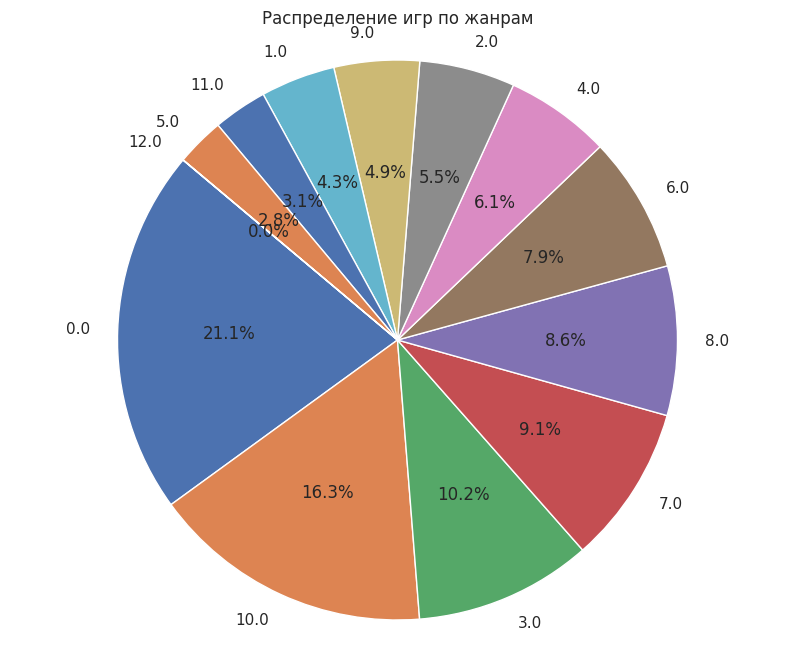

In [ ]:
# Подсчет количества игр для каждого жанра
genre_counts = df_origin['Genre'].value_counts()

# Создание круговой диаграммы
plt.figure(figsize=(10, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Распределение игр по жанрам')
plt.axis('equal')  # Сделаем круговую диаграмму круглой
plt.show()


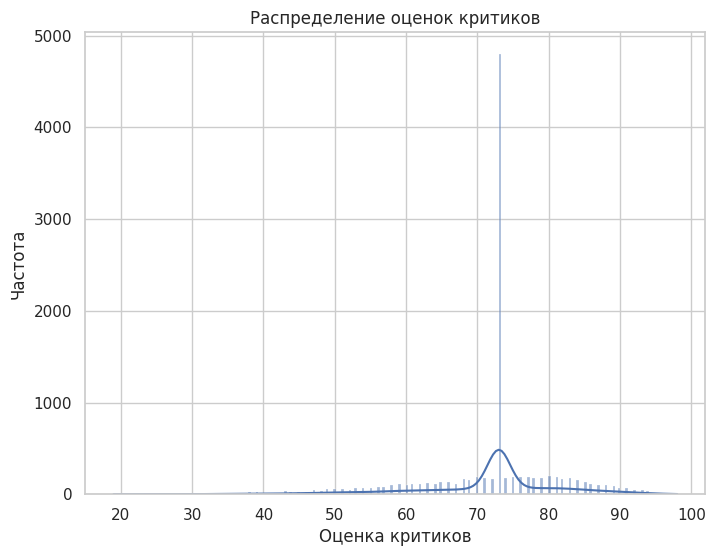

In [ ]:
# Гистограмма распределения оценок критиков
plt.figure(figsize=(8, 6))
sns.histplot(df_origin['Critic_Score'], kde=True)
plt.title('Распределение оценок критиков')
plt.xlabel('Оценка критиков')
plt.ylabel('Частота')
plt.show()


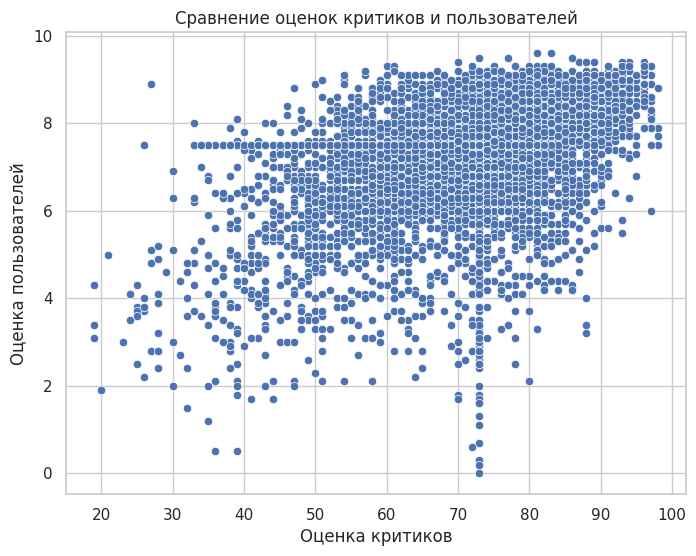

In [ ]:
# Точечная диаграмма для сравнения оценок критиков и пользователей
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_origin, x='Critic_Score', y='User_Score')
plt.title('Сравнение оценок критиков и пользователей')
plt.xlabel('Оценка критиков')
plt.ylabel('Оценка пользователей')
plt.show()


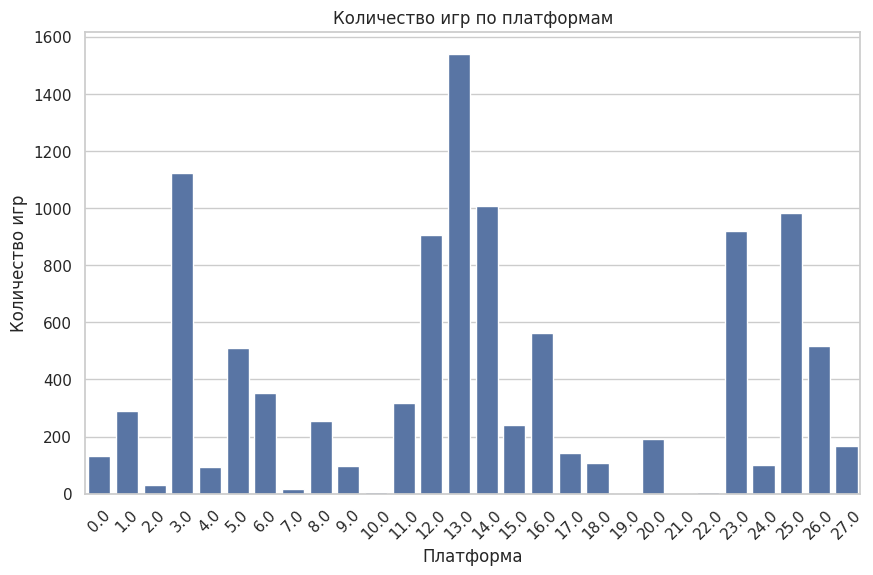

In [ ]:
# Визуализация столбчатой диаграммы для количества игр по платформам
plt.figure(figsize=(10, 6))
sns.countplot(data=df_origin, x='Platform')
plt.title('Количество игр по платформам')
plt.xlabel('Платформа')
plt.ylabel('Количество игр')
plt.xticks(rotation=45)
plt.show()


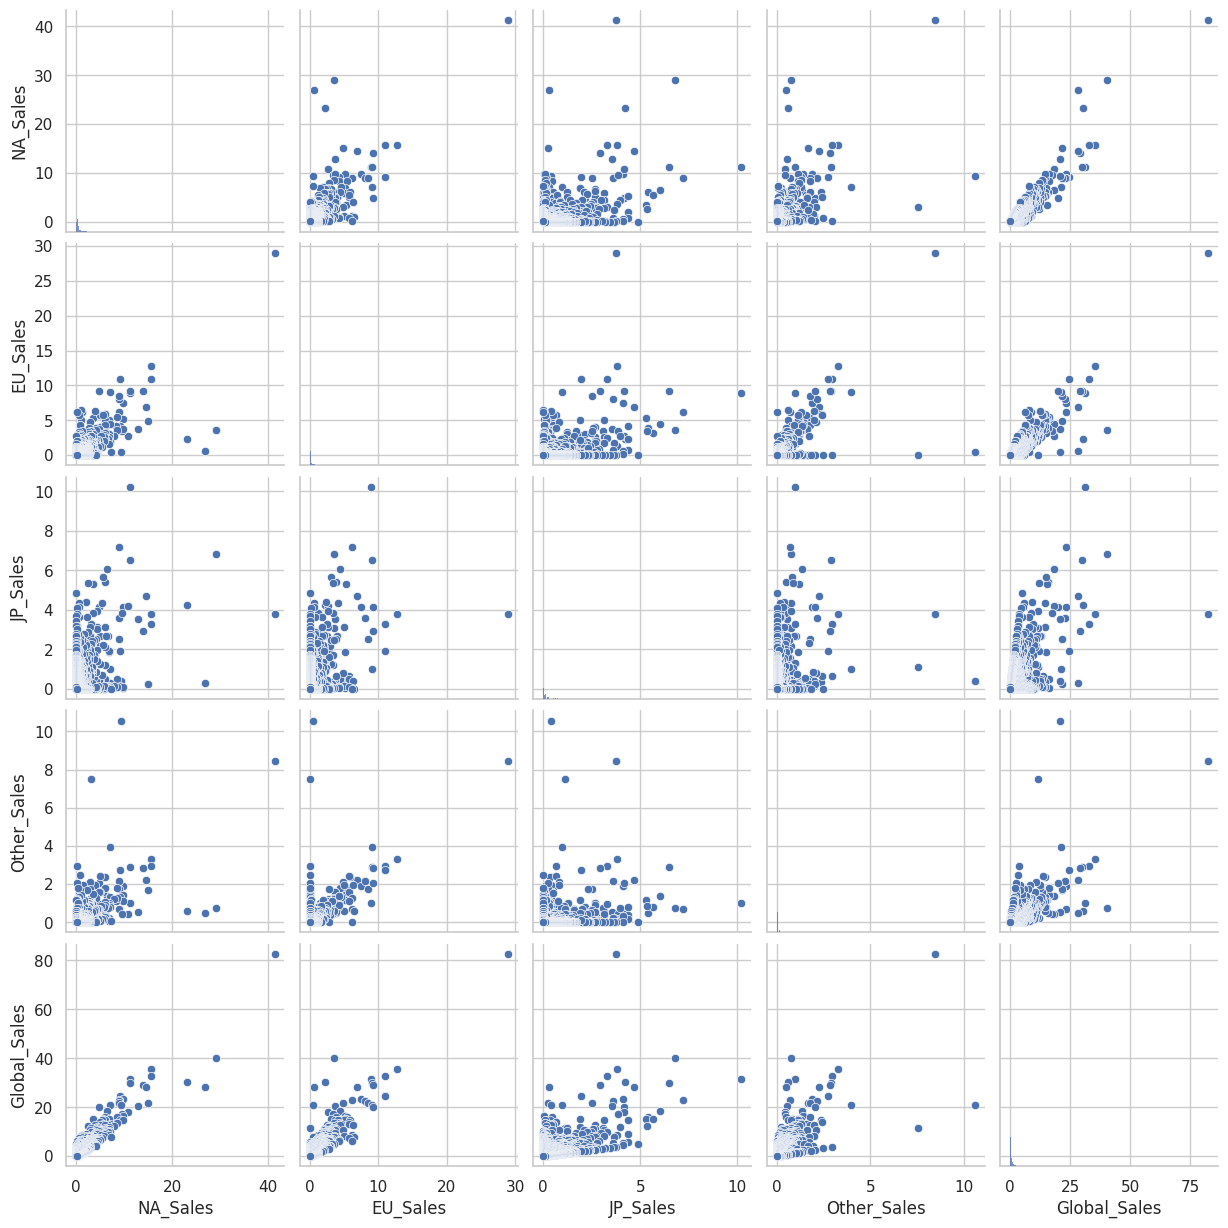

In [ ]:
# Визуализация матрицы диаграмм рассеяния
sns.pairplot(df_origin[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']])
plt.show()


In [ ]:
# Определение корреляций между числовыми столбцами
correlation = df_origin.select_dtypes(include=['float64', 'Int64']).corr()
print(correlation)


                     Name  Platform  Year_of_Release     Genre  Publisher  \
Name             1.000000  0.001986        -0.005762 -0.021928   0.034796   
Platform         0.001986  1.000000         0.236596  0.042157  -0.013032   
Year_of_Release -0.005762  0.236596         1.000000 -0.087040   0.071230   
Genre           -0.021928  0.042157        -0.087040  1.000000  -0.085260   
Publisher        0.034796 -0.013032         0.071230 -0.085260   1.000000   
NA_Sales         0.013871  0.032123        -0.068082  0.009333  -0.006599   
EU_Sales         0.005969  0.034166         0.043512  0.010049   0.005433   
JP_Sales         0.019220 -0.115847        -0.175699  0.032780   0.047788   
Other_Sales     -0.010363  0.044402         0.079753  0.002481   0.009443   
Global_Sales     0.011902  0.010044        -0.047524  0.015154   0.009102   
Critic_Score     0.015871 -0.000172        -0.022680  0.124852  -0.006392   
Critic_Count    -0.000287  0.208205         0.172900 -0.012340   0.025643   

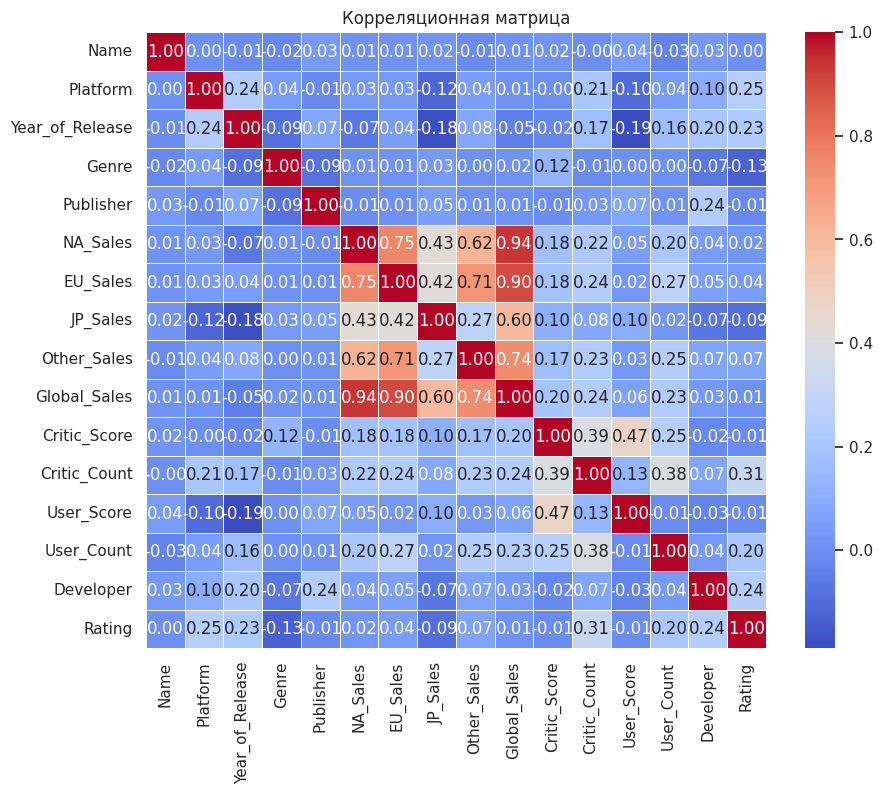

In [ ]:
# Построение корреляционной матрицы с использованием heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Корреляционная матрица')
plt.show()


In [ ]:
# Группировка данных по жанру и агрегация продаж
genre_sales = df_origin.groupby('Genre').agg({
    'NA_Sales': 'mean',
    'EU_Sales': 'mean',
    'JP_Sales': 'mean',
    'Other_Sales': 'mean',
    'Global_Sales': 'mean'
}).reset_index()

print(genre_sales)


    Genre  NA_Sales  EU_Sales  JP_Sales  Other_Sales  Global_Sales
0     0.0  0.382539  0.226680  0.064913     0.081258      0.755489
1     1.0  0.213873  0.130219  0.074508     0.034026      0.452319
2     2.0  0.373055  0.168106  0.137747     0.061177      0.740034
3     3.0  0.362033  0.191270  0.088813     0.067231      0.709457
4     4.0  0.679023  0.306093  0.200403     0.078264      1.263752
5     5.0  0.388215  0.160168  0.187710     0.039731      0.776229
6     6.0  0.417590  0.276787  0.066091     0.089868      0.850228
7     7.0  0.333790  0.190844  0.351020     0.060381      0.935767
8     8.0  0.635607  0.341093  0.040087     0.112536      1.129344
9     9.0  0.334073  0.210096  0.114493     0.057036      0.715660
10   10.0  0.387629  0.214690  0.074365     0.077067      0.753843
11   11.0  0.192900  0.121088  0.136556     0.029970      0.480514
12   12.0  1.780000  0.530000  0.000000     0.080000      2.390000


Судя по результатам агрегированных данных о средних продажах для каждого жанра в различных регионах и глобально, можно сделать следующие наблюдения:

1. **Platform (Платформеры)** имеют высокие средние продажи в Северной Америке и Европе, что может быть связано с популярностью данного жанра в этих регионах. Глобальные продажи для этого жанра также высоки.

2. **Shooter (Шутеры)** имеют высокие средние продажи в Северной Америке и Европе, что соответствует ожиданиям, учитывая популярность этого жанра в этих регионах.

3. **Role-Playing (Ролевые игры)** имеют относительно высокие средние продажи в Японии, что отражает предпочтения этого региона к данному жанру.

4. **Sports (Спортивные игры)** также имеют высокие средние продажи в Северной Америке и Европе, что подтверждает популярность спортивных игр в этих регионах.

5. **Unknown (Неизвестные игры)** имеют очень высокие средние продажи. Однако, этот результат скорее всего вызван малым количеством данных и не является репрезентативным.


# Регрессия

Выберите целевую переменную и решите задачу регрессии, рассмотрев 10 моделей и определив 6 метрики работы моделей.

Выберите лучшую модель. Для лучшей модели определите значимость признаков.

Отбросив половину худших признаков, определите метрики работы модели без этих признаков.

Подберите оптимальные параметры лучшей модели и определите метрики работы модели при этих значениях.

Оцените качество работы лучшей моделей на основе кросс-валидации.

Постройте кривые обучения (потерь) и оцените недообучение и переобучение.

Для целевой переменной выберем User_Count

Для решения задачи регрессии используем 10 моделей:
Каждая из этих моделей является методом машинного обучения для решения задачи регрессии, т.е. предсказания непрерывной переменной на основе входных данных. Вот краткое пояснение к каждой модели:

1. **LinearRegression**: Это простая линейная регрессия, которая строит линейную зависимость между входными признаками и целевой переменной.

2. **Ridge**: Модель регрессии Ridge является линейной моделью, которая добавляет штраф к сумме квадратов коэффициентов (L2-регуляризация), чтобы снизить переобучение.

3. **Lasso**: Это также линейная модель, но с добавленным штрафом к сумме абсолютных значений коэффициентов (L1-регуляризация), что позволяет сжимать коэффициенты до нуля и вести отбор признаков.

4. **ElasticNet**: Эта модель комбинирует L1- и L2-регуляризацию, представляя собой смесь регрессии Lasso и Ridge.

5. **BayesianRidge**: Это вероятностная модель, которая основана на байесовской статистике и обеспечивает более гибкий подход к регуляризации.

6. **DecisionTreeRegressor**: Это непараметрическая модель, которая использует дерево решений для разбиения пространства признаков на подмножества, предсказывая целевую переменную в каждом листе дерева.

7. **RandomForestRegressor**: Это ансамблевая модель, состоящая из нескольких деревьев решений, где каждое дерево строится на случайной подвыборке данных и случайном подмножестве признаков.

8. **GradientBoostingRegressor**: Это еще одна ансамблевая модель, которая строит деревья решений последовательно, минимизируя ошибку предыдущего дерева при обучении следующего.

9. **ExtraTreesRegressor**: Это модель, похожая на RandomForest, но использующая случайные разбиения для каждого признака, а не наилучшее разбиение.

10. **SVR (Support Vector Regressor)**: Это модель, основанная на методе опорных векторов, который ищет оптимальную гиперплоскость для разделения данных с минимальной ошибкой.

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, explained_variance_score, max_error, mean_squared_log_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import median_absolute_error

In [ ]:
df = pd.read_csv('/content/Video_Games_Preprocessed.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,6946.0,23.0,2006.0,10.0,215.0,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,739.0,1.0
1,5841.0,9.0,1985.0,4.0,215.0,29.08,3.58,6.81,0.77,40.24,73.0,25.0,7.5,29.0,333.0,1.0
2,3451.0,23.0,2008.0,6.0,215.0,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,739.0,1.0
3,6948.0,23.0,2009.0,10.0,215.0,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,739.0,1.0
4,4620.0,4.0,1996.0,7.0,215.0,11.27,8.89,10.22,1.00,31.37,73.0,25.0,7.5,29.0,333.0,1.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10613 entries, 0 to 10612
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             10613 non-null  float64
 1   Platform         10613 non-null  float64
 2   Year_of_Release  10613 non-null  float64
 3   Genre            10613 non-null  float64
 4   Publisher        10613 non-null  float64
 5   NA_Sales         10613 non-null  float64
 6   EU_Sales         10613 non-null  float64
 7   JP_Sales         10613 non-null  float64
 8   Other_Sales      10613 non-null  float64
 9   Global_Sales     10613 non-null  float64
 10  Critic_Score     10613 non-null  float64
 11  Critic_Count     10613 non-null  float64
 12  User_Score       10613 non-null  float64
 13  User_Count       10613 non-null  float64
 14  Developer        10613 non-null  float64
 15  Rating           10613 non-null  float64
dtypes: float64(16)
memory usage: 1.3 MB


In [ ]:
# Выбор целевой переменной и признаков
X = df.drop('User_Count', axis=1)
y = df['User_Count']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)


In [ ]:
# Создание списка моделей
models = [LinearRegression(), Ridge(), Lasso(), ElasticNet(), BayesianRidge(), DecisionTreeRegressor(), RandomForestRegressor(), GradientBoostingRegressor(), ExtraTreesRegressor(), SVR()]

for model in models:
    # Обучение модели
    model.fit(X_train, y_train)

    # Предсказание на тестовой выборке
    y_pred = model.predict(X_test)

    # Вычисление метрик
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred)
    me = max_error(y_test, y_pred)
    medae = median_absolute_error(y_test, y_pred)

    print(f"Модель: {model.__class__.__name__}")
    print(f"Среднеквадратичная ошибка: {mse}")
    print(f"Средняя абсолютная ошибка: {mae}")
    print(f"Коэффициент детерминации R2: {r2}")
    print(f"Объясненная дисперсия: {evs}")
    print(f"Максимальная ошибка: {me}")
    print(f"Медианная абсолютная ошибка: {medae}")
    print('-----------------------------------')


Модель: LinearRegression
Среднеквадратичная ошибка: 121014.63404921097
Средняя абсолютная ошибка: 156.89536384688458
Коэффициент детерминации R2: 0.26648857115645597
Объясненная дисперсия: 0.2668080037708962
Максимальная ошибка: 5000.9928192958305
Медианная абсолютная ошибка: 88.51606714347145
-----------------------------------
Модель: Ridge
Среднеквадратичная ошибка: 120909.75993892239
Средняя абсолютная ошибка: 156.74752836254862
Коэффициент детерминации R2: 0.2671242493047301
Объясненная дисперсия: 0.2674369992402933
Максимальная ошибка: 4993.97178760896
Медианная абсолютная ошибка: 86.94724224920719
-----------------------------------
Модель: Lasso
Среднеквадратичная ошибка: 120957.01058515174
Средняя абсолютная ошибка: 156.27988197460843
Коэффициент детерминации R2: 0.2668378468435585
Объясненная дисперсия: 0.2671327722980771
Максимальная ошибка: 5007.394098377208
Медианная абсолютная ошибка: 86.47734036075781
-----------------------------------
Модель: ElasticNet
Среднеквадратич

Оценив результаты регрессии, можно сделать следующие выводы:

1. **ExtraTreesRegressor и RandomForestRegressor**:
   - Эти модели демонстрируют хороший коэффициент детерминации R2, (0.725 и 0.691). Это указывает на то, что они хорошо соотносятся с данными и объясняют большую часть дисперсии целевой переменной. Средняя абсолютная ошибка и среднеквадратичная ошибка также относительно низкие, что указывает на то, что модели в целом хорошо предсказывают целевую переменную, однако все же частично далеки от идеала.

2. **Модели Lasso, ElasticNet и SVR**:
   - Эти модели показывают более низкие коэффициенты детерминации R2 и более высокие ошибки, что указывает на то, что они менее эффективны в предсказании целевой переменной. Модель Lasso имеет наибольшую среднеквадратичную ошибку и максимальную ошибку, что может указывать на ее недостаточную гибкость или проблемы с выбором регуляризации.
3. **Остальные модели**:
   - Оставшиеся модели показывают средние и не совсем пригодные для работы результаты.

*Общий вывод состоит в том, что линейные модели (LinearRegression, Ridge, BayesianRidge) и модели на основе деревьев (DecisionTreeRegressor, Random Forest, Gradient Boosting, Extra Trees) лучше всего справляются с задачей регрессии в данном контексте.*

Список моделей от лучшей к худшей:

(отсортированный по убыванию среднеквадратичной ошибки)

1. ExtraTreesRegressor
2. RandomForestRegressor
3. GradientBoostingRegressor
4. SVR
5. DecisionTreeRegressor
6. BayesianRidge
7. Ridge
8. Lasso
9. ElasticNet
10. LinearRegression

In [ ]:
# Создаем модель RandomForestRegressor
best_model = ExtraTreesRegressor()

# Обучаем модель
best_model.fit(X_train, y_train)

# Получаем важность признаков
feature_importance = best_model.feature_importances_

# Создаем DataFrame для важности признаков
feature_importance_df = pd.DataFrame({"Feature": X_train.columns, "Importance": feature_importance})

# Сортируем DataFrame по абсолютному значению важности
feature_importance_df = feature_importance_df.reindex(feature_importance_df.Importance.abs().sort_values(ascending=False).index)

# Выводим важность признаков
print(feature_importance_df)


            Feature  Importance
11     Critic_Count    0.175376
10     Critic_Score    0.138862
12       User_Score    0.096190
1          Platform    0.087720
2   Year_of_Release    0.084624
6          EU_Sales    0.081340
14           Rating    0.071801
9      Global_Sales    0.044243
8       Other_Sales    0.040928
5          NA_Sales    0.037818
0              Name    0.035625
13        Developer    0.031515
7          JP_Sales    0.024886
3             Genre    0.024798
4         Publisher    0.024275


Исходя из представленных значений важности признаков:

1. **Critic_Count** и **Critic_Score** являются наиболее важными признаками для модели, что указывает на значительное влияние оценок критиков на успех игры (количество пользователей).

2. **Platform** и **User_Score** также имеют существенное влияние на модель. Это может быть связано с популярностью платформы и мнением пользователей о качестве игры.

3. **EU_Sales**, **Year_of_Release** и **Rating** следующие по важности. Продажи в Европе, год выпуска игры и рейтинг игры могут сильно влиять на ее успешность.

4. **NA_Sales**, **Global_Sales**, **Name**, **Other_Sales**, **Developer**, **Genre**, **Publisher** и **JP_Sales** имеют меньшее влияние на модель, но все равно оказывают некоторое воздействие на прогнозирование успешности игр.

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Определение количества признаков для отбрасывания
num_features_to_drop = len(feature_importance_df) // 2

# Отбрасываем половину признаков с наименьшей важностью
dropped_features = feature_importance_df.tail(num_features_to_drop)["Feature"]

# Создаем новые обучающую и тестовую выборки без отброшенных признаков
X_train_dropped = X_train.drop(columns=dropped_features)
X_test_dropped = X_test.drop(columns=dropped_features)

# Обучаем модель на новой обучающей выборке
best_model.fit(X_train_dropped, y_train)

# Предсказание на новой тестовой выборке
y_pred_dropped = best_model.predict(X_test_dropped)

# Вычисление метрик
mse = mean_squared_error(y_test, y_pred_dropped)
mae = mean_absolute_error(y_test, y_pred_dropped)
r2 = r2_score(y_test, y_pred_dropped)
evs = explained_variance_score(y_test, y_pred_dropped)
me = max_error(y_test, y_pred_dropped)
medae = median_absolute_error(y_test, y_pred_dropped)

print(f"Среднеквадратичная ошибка: {mse}")
print(f"Средняя абсолютная ошибка: {mae}")
print(f"Коэффициент детерминации R2: {r2}")
print(f"Объясненная дисперсия: {evs}")
print(f"Максимальная ошибка: {me}")
print(f"Медианная абсолютная ошибка: {medae}")
print('-----------------------------------')


Среднеквадратичная ошибка: 43339.12454126237
Средняя абсолютная ошибка: 51.45454074422986
Коэффициент детерминации R2: 0.7373066206673626
Объясненная дисперсия: 0.7374352501424826
Максимальная ошибка: 3641.94
Медианная абсолютная ошибка: 3.460000000000001
-----------------------------------


По результатам оценки можно сделать следующие выводы:
Модель: ExtraTreesRegressor

1. **Среднеквадратичная ошибка**: Уменьшилась с 45312.199 до 43339.12454126237.Это небольшое улучшение, что говорит о том, что модель стала предсказывать целевую переменную слегка лучше.

2. **Средняя абсолютная ошибка**: Уменьшилась с 53.30 до 51.45. Это также небольшое улучшение, указывающее на то, что модель стала делать более точные прогнозы по сравнению с предыдущим результатом. Заметим разное поведение в изменении этих первых двух метрик

3. **Коэффициент детерминации R2**: Увеличился с 0.725 до 0.737 .Этот параметр показывает, насколько хорошо модель соответствует данным. Уменьшение коэффициента детерминации свидетельствует о менее точных прогнозах.

4. **Объясненная дисперсия** : Уменьшилась с 0.725 до 0.737, что означает, что модель теперь лучше объясняет изменения в целевой переменной.

5. **Максимальная ошибка** : Это разница между предсказанным и фактическим значением целевой переменной для наиболее отклоняющегося наблюдения. В вашем случае максимальная ошибка увеличилась с 3407.81 до 3641.94, что означает, что модель теперь предсказывает более высокие значения для некоторых наблюдений.

6. **Медианная абсолютная ошибка** : Это медиана всех абсолютных отклонений между предсказанными и фактическими значениями. В вашем случае медианная абсолютная ошибка уменьшилась с 3.719 до 3.46, что означает, что модель теперь лучше предсказывает значения.

В целом, изменения в метриках оценки свидетельствуют о том, что модель стала работать слегка **лучше** после отбрасывания.

Для подбора оптимальных параметров лучшей модели можно использовать метод кросс-валидации с поиском по сетке (GridSearchCV). В этом методе перебираются различные комбинации значений параметров модели, а затем выбирается комбинация, которая дает наилучшую производительность на кросс-валидации.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Создание модели
br = ExtraTreesRegressor()

# Определение сетки параметров для поиска
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Создание объекта GridSearchCV
grid_search = GridSearchCV(estimator=br, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Обучение модели с помощью GridSearchCV
grid_search.fit(X_train, y_train)


# Вывод лучших параметров
print("Лучшие параметры: ", grid_search.best_params_)

# Предсказание на тестовой выборке
y_pred = grid_search.predict(X_test)

# Получение лучшей модели
best_model = grid_search.best_estimator_




Fitting 3 folds for each of 270 candidates, totalling 810 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


Лучшие параметры:  {'bootstrap': False, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
# Получение лучшей модели
best_model = grid_search.best_estimator_

In [ ]:
# Вычисление метрик
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
me = max_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)

print(f"Среднеквадратичная ошибка: {mse}")
print(f"Средняя абсолютная ошибка: {mae}")
print(f"Коэффициент детерминации R2: {r2}")
print(f"Объясненная дисперсия: {evs}")
print(f"Максимальная ошибка: {me}")
print(f"Медианная абсолютная ошибка: {medae}")
print('-----------------------------------')

Среднеквадратичная ошибка: 42888.16987425813
Средняя абсолютная ошибка: 51.30715967969854
Коэффициент детерминации R2: 0.7400400124156982
Объясненная дисперсия: 0.7400430902785298
Максимальная ошибка: 3581.755
Медианная абсолютная ошибка: 3.62
-----------------------------------


После подбора параметров мы можем заметить такие изменения:

**Среднеквадратичная ошибка (MSE)**: После подбора параметров MSE уменьшился с 43339.124 до 42888.169. Это означает, что модель стала предсказывать значения с меньшей ошибкой по сравнению со старой моделью.

**Средняя абсолютная ошибка (MAE)**: MAE также уменьшился после подбора параметров с 51.45 до 51.30. Это означает, что в среднем модель стала предсказывать значения с меньшей абсолютной ошибкой.

**Коэффициент детерминации R^2 (R-squared)**: R^2 увеличился после подбора параметров с 0.737 до 0.740. Это означает, что модель лучше объясняет изменчивость зависимой переменной.

**Объясненная дисперсия**: Объясненная дисперсия также увеличилась после подбора параметров с 0.737 до 0.740. Это означает, что модель также лучше объясняет изменчивость зависимой переменной.

**Максимальная ошибка**: Максимальная ошибка уменьшилась после подбора параметров с 3641.94 до 3581.755. Это означает, что модель стала предсказывать значения с меньшей максимальной ошибкой.

**Медианная абсолютная ошибка**: Медианная абсолютная ошибка увеличилась после подбора параметров с 3.46 до 3.62. Это означает, что медианное значение абсолютной ошибки стало немного больше после подбора параметров.


Эти результаты говорят о том, что в целом подбор оптимальных параметров для модели ExtraTreesRegressor помог улучшить ее производительность.

In [ ]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation and calculate metrics
cv_scores_mse = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_scores_mae = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_scores_r2 = cross_val_score(best_model, X_train, y_train, cv=5, scoring='r2')
cv_scores_evs = cross_val_score(best_model, X_train, y_train, cv=5, scoring='explained_variance')
# Replace max_error with mean_absolute_error
cv_scores_me = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
cv_scores_medae = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_median_absolute_error')

# Convert negative scores to positive for MSE and MedAE
cv_scores_mse = -cv_scores_mse
cv_scores_medae = -cv_scores_medae

# Calculate the mean of the scores
mean_cv_mse = np.mean(cv_scores_mse)
mean_cv_mae = np.mean(cv_scores_mae)
mean_cv_r2 = np.mean(cv_scores_r2)
mean_cv_evs = np.mean(cv_scores_evs)
# Use the same conversion for MAE as for MSE
mean_cv_me = -np.mean(cv_scores_me)
mean_cv_medae = np.mean(cv_scores_medae)




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

In [ ]:
# Print the mean scores
print("Средняя абсолютная ошибка (MAE) на кросс-валидации:", mean_cv_mae)
print("Средняя квадратичная ошибка (MSE) на кросс-валидации:", mean_cv_mse)
print("Коэффициент детерминации (R^2) на кросс-валидации:", mean_cv_r2)
print("Объясненная дисперсия (explained variance score) на кросс-валидации:", mean_cv_evs)
# Print the new metric
print("Средняя абсолютная ошибка (MAE) на кросс-валидации:", mean_cv_me)
print("Медианная абсолютная ошибка на кросс-валидации:", mean_cv_medae)

Средняя абсолютная ошибка (MAE) на кросс-валидации: -53.94372025912838
Средняя квадратичная ошибка (MSE) на кросс-валидации: 74771.04753126914
Коэффициент детерминации (R^2) на кросс-валидации: 0.666732319849217
Объясненная дисперсия (explained variance score) на кросс-валидации: 0.6643438933795192
Средняя абсолютная ошибка (MAE) на кросс-валидации: 54.80600647820965
Медианная абсолютная ошибка на кросс-валидации: 4.205




Метрики кросс-валидации представляют собой оценку модели на нескольких разбиениях обучающего набора данных. В нашем случае они демонстрируют, что модели сложнее определять значения после кросс-валидации, о чем говорят пониженные показатели для всех метрик. Это говорит о том, что модель не идеальна и имеет небольшие уязвимости

In [ ]:
from sklearn.model_selection import learning_curve


# Получаем кривые обучения
train_sizes, train_scores, test_scores = learning_curve(estimator=best_model,
                                                        X=X_train,
                                                        y=y_train,
                                                        train_sizes=np.linspace(0.1, 1.0, 10),
                                                        cv=5,
                                                        scoring='neg_mean_squared_error')

# Считаем средние и стандартные отклонения
train_mean = np.mean(-train_scores, axis=1)
train_std = np.std(-train_scores, axis=1)
test_mean = np.mean(-test_scores, axis=1)
test_std = np.std(-test_scores, axis=1)




/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

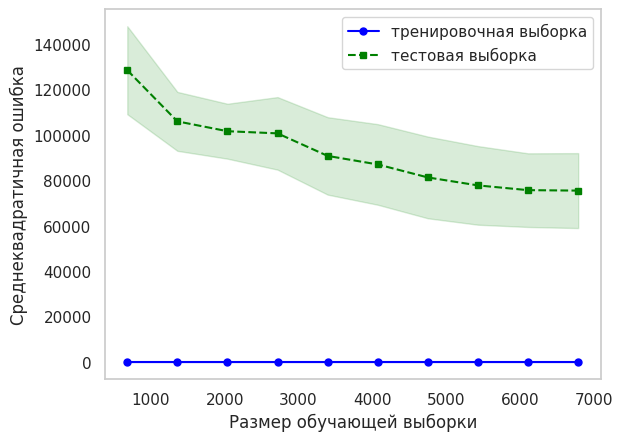

In [ ]:
# Строим графики
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='тренировочная выборка')
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')

plt.plot(train_sizes, test_mean, color='green', linestyle='--', marker='s', markersize=5, label='тестовая выборка')
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')

plt.grid()
plt.xlabel('Размер обучающей выборки')
plt.ylabel('Среднеквадратичная ошибка')
plt.legend(loc='upper right')
plt.show()

График обучения модели показывает, что по мере увеличения размера обучающего набора данных ошибка обучения остается низкой и стабильной, в то время как ошибка тестирования уменьшается и стабилизируется. Это указывает на хорошую подгонку модели. Теневая область вокруг кривой тестирования представляет собой дисперсию или неопределенность ошибки.

Это изображение показывает кривые обучения модели, иллюстрируя, как увеличение размера обучающего набора данных влияет на ошибки обучения и тестирования, что важно для оценки производительности модели.


# Классификация


Выберите целевую переменную и решите задачу классификации, рассмотрев минимум 10 моделей и определив 8 метрик работы моделей.

Выберите лучшую модель. Подберите оптимальные параметры лучшей модели и определите метрики работы модели при этих значениях.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import precision_score, roc_auc_score, f1_score, recall_score, accuracy_score, balanced_accuracy_score, jaccard_score, hamming_loss
from sklearn.preprocessing import label_binarize
from sklearn.metrics import matthews_corrcoef
from sklearn.ensemble import AdaBoostClassifier


In [ ]:
df = pd.read_csv('/content/Video_Games_Preprocessed.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,6946.0,23.0,2006.0,10.0,215.0,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,739.0,1.0
1,5841.0,9.0,1985.0,4.0,215.0,29.08,3.58,6.81,0.77,40.24,73.0,25.0,7.5,29.0,333.0,1.0
2,3451.0,23.0,2008.0,6.0,215.0,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,739.0,1.0
3,6948.0,23.0,2009.0,10.0,215.0,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,739.0,1.0
4,4620.0,4.0,1996.0,7.0,215.0,11.27,8.89,10.22,1.00,31.37,73.0,25.0,7.5,29.0,333.0,1.0


In [ ]:
# Предполагая, что df - это ваш DataFrame
for column in df.columns:
    # Подсчет уникальных значений в столбце
    unique_values = df[column].nunique()
    # Если есть более одного уникального значения, выводим название столбца
    if unique_values > 1:
        print(f"Столбец '{column}' имеет {unique_values} уникальных значений.")


Столбец 'Name' имеет 7247 уникальных значений.
Столбец 'Platform' имеет 28 уникальных значений.
Столбец 'Year_of_Release' имеет 38 уникальных значений.
Столбец 'Genre' имеет 13 уникальных значений.
Столбец 'Publisher' имеет 364 уникальных значений.
Столбец 'NA_Sales' имеет 402 уникальных значений.
Столбец 'EU_Sales' имеет 307 уникальных значений.
Столбец 'JP_Sales' имеет 244 уникальных значений.
Столбец 'Other_Sales' имеет 155 уникальных значений.
Столбец 'Global_Sales' имеет 620 уникальных значений.
Столбец 'Critic_Score' имеет 79 уникальных значений.
Столбец 'Critic_Count' имеет 107 уникальных значений.
Столбец 'User_Score' имеет 91 уникальных значений.
Столбец 'User_Count' имеет 832 уникальных значений.
Столбец 'Developer' имеет 1238 уникальных значений.
Столбец 'Rating' имеет 7 уникальных значений.


В качестве целевой переменной можно выбрать столбец 'Rating'.

Для решения этой задачи будем использовать различные модели классификации, такие как:

1. **Logistic Regression (Логистическая регрессия)**:
   - Используется для бинарной классификации.
   - Основана на логистической функции, которая преобразует выходные значения в вероятности.
   - Подходит для прогнозирования вероятности принадлежности к одному из двух классов.

2. **Decision Tree (Дерево решений)**:
   - Построено на принципе разделения набора данных на подгруппы, основанные на значениях признаков.
   - Используется для классификации и регрессии.
   - Просто интерпретируется и подвержено проблеме переобучения.

3. **Random Forest (Случайный лес)**:
   - Ансамблевый метод, состоящий из множества деревьев решений.
   - Использует процесс бутстрэпа для создания различных наборов данных и уменьшения дисперсии.
   - Позволяет автоматически оценивать важность признаков.

4. **Gradient Boosting (Градиентный бустинг)**:
   - Также ансамблевый метод, который строит модель пошагово, минимизируя ошибку предыдущих шагов.
   - Обычно использует деревья решений в качестве базовых моделей.
   - Эффективен в задачах классификации и регрессии, обычно имеет высокую точность.

5. **SVM (Метод опорных векторов)**:
   - Используется для классификации и регрессии.
   - Создает гиперплоскость в пространстве признаков, которая разделяет классы.
   - Пытается максимизировать расстояние между точками разных классов.

6. **K-Nearest Neighbors (Метод k ближайших соседей)**:
   - Основан на идее, что объекты с похожими признаками обычно имеют схожие целевые значения.
   - Классифицирует объекты на основе классов их ближайших соседей в пространстве признаков.

7. **Gaussian Naive Bayes (Наивный байесовский классификатор)**:
   - Основан на теореме Байеса и предполагает, что признаки влияют на класс независимо друг от друга.
   - Подходит для текстовой классификации и других задач, где признаки могут быть независимыми.

8. **MLP Classifier (Многослойный персептрон)**:
   - Используется для классификации.
   - Это нейронная сеть, состоящая из нескольких слоев, включая входной, скрытые и выходной слои.
   - Обучается с использованием алгоритма обратного распространения ошибки.

9. **Linear Discriminant Analysis (Линейный дискриминантный анализ)**:
   - Используется для классификации и снижения размерности признаков.
   - Метод основан на линейной комбинации признаков, которая максимизирует различия между классами.

10. **Ada Boost Classifier (Адаптивный бустинг)**:
    - Ансамблевый метод, который комбинирует несколько слабых моделей в одну сильную модель.
    - Итеративно обучает модели, сосредотачиваясь на неправильно классифицированных образцах.

Используем метрики:

1. **Accuracy (Точность)**:
   - Показывает долю правильно классифицированных образцов относительно всех образцов.
   - Формула: (TP + TN) / (TP + TN + FP + FN).
   
2. **Recall (Полнота)**:
   - Показывает долю правильно классифицированных положительных образцов относительно всех реальных положительных образцов.
   - Также известен как чувствительность или true positive rate (TPR).
   - Формула: TP / (TP + FN).

3. **Precision (Точность)**:
   - Показывает долю правильно классифицированных положительных образцов относительно всех образцов, классифицированных как положительные.
   - Также известен как positive predictive value (PPV).
   - Формула: TP / (TP + FP).

4. **F1 Score (F1-мера)**:
   - Среднее гармоническое между precision и recall.
   - Учитывает как precision, так и recall, что полезно, когда классы несбалансированы.
   - Формула: 2 * (precision * recall) / (precision + recall).

5. **Balanced Accuracy (Сбалансированная точность)**:
   - Среднее арифметическое между чувствительностью (recall) и специфичностью.
   - Полезно, когда классы несбалансированы.
   - Формула: (sensitivity + specificity) / 2.

6. **Jaccard Score (Коэффициент Жаккара)**:
   - Измеряет сходство между двумя наборами меток путем измерения их пересечения по отношению к их объединению.
   - Используется в случае мультиклассовой классификации.
   - Формула: TP / (TP + FP + FN).

7. **Hamming Loss (Потеря Хэмминга)**:
   - Измеряет долю меток, которые были неправильно классифицированы.
   - Чем ниже значение, тем лучше производительность модели.
   - Формула: (FP + FN) / (TP + TN + FP + FN).

8. **Matthews Correlation Coefficient (Коэффициент корреляции Мэтьюса)**:
   - Измеряет качество бинарной классификации, учитывая баланс классов.
   - Принимает значения от -1 до +1, где +1 означает идеальное предсказание, 0 - случайное предсказание, а -1 - обратное предсказание.

In [ ]:
# Выбор целевой переменной
y = df['Rating']
X = df.drop('Rating', axis=1)

# Разделение данных на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [ ]:
# Обучение моделей
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), GradientBoostingClassifier(), svm.SVC(), KNeighborsClassifier(), GaussianNB(), MLPClassifier(), LinearDiscriminantAnalysis(), AdaBoostClassifier()]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVM', 'K-Nearest Neighbors', 'Gaussian Naive Bayes', 'MLP Classifier', 'Linear Discriminant Analysis', 'Ada Boost Classifier']

for i, model in enumerate(models):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Вычисление метрик
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    jaccard = jaccard_score(y_test, y_pred, average='weighted')
    hamming = hamming_loss(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)

    print(f'Модель: {model_names[i]}')
    print(f'Accuracy: {accuracy}')
    print(f'Recall: {recall}')
    print(f'Precision: {precision}')
    print(f'F1 Score: {f1}')
    print(f'Balanced Accuracy: {balanced_accuracy}')
    print(f'Jaccard Score: {jaccard}')
    print(f'Hamming Loss: {hamming}')
    print(f'Matthews Correlation Coefficient: {mcc}')
    print('-----------------------------------')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_

Модель: Logistic Regression
Accuracy: 0.6630781499202552
Recall: 0.6630781499202552
Precision: 0.5813390995682105
F1 Score: 0.5826595494593821
Balanced Accuracy: 0.2161928970442607
Jaccard Score: 0.46999563539763434
Hamming Loss: 0.3369218500797448
Matthews Correlation Coefficient: 0.2173583542969276
-----------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Модель: Decision Tree
Accuracy: 0.7691387559808612
Recall: 0.7691387559808612
Precision: 0.7669111101929853
F1 Score: 0.7679642164572875
Balanced Accuracy: 0.49104977486370743
Jaccard Score: 0.6535800548176859
Hamming Loss: 0.23086124401913877
Matthews Correlation Coefficient: 0.5682578125921336
-----------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Модель: Random Forest
Accuracy: 0.8145933014354066
Recall: 0.8145933014354066
Precision: 0.8079954290600769
F1 Score: 0.8032810364505385
Balanced Accuracy: 0.5062422999785239
Jaccard Score: 0.6984779547918021
Hamming Loss: 0.1854066985645933
Matthews Correlation Coefficient: 0.6404298062114322
-----------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Модель: Gradient Boosting
Accuracy: 0.8080143540669856
Recall: 0.8080143540669856
Precision: 0.7982104995551947
F1 Score: 0.7971140968683436
Balanced Accuracy: 0.5019345766334141
Jaccard Score: 0.6913563643110816
Hamming Loss: 0.19198564593301434
Matthews Correlation Coefficient: 0.6272635162158615
-----------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Модель: SVM
Accuracy: 0.6634768740031898
Recall: 0.6634768740031898
Precision: 0.5831762965300656
F1 Score: 0.5444284855374298
Balanced Accuracy: 0.20064075164046344
Jaccard Score: 0.4437592645469491
Hamming Loss: 0.3365231259968102
Matthews Correlation Coefficient: 0.20370765299695937
-----------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Модель: K-Nearest Neighbors
Accuracy: 0.7579744816586922
Recall: 0.7579744816586922
Precision: 0.7405637345371926
F1 Score: 0.7449976092250054
Balanced Accuracy: 0.383608034064862
Jaccard Score: 0.6197869757454277
Hamming Loss: 0.2420255183413078
Matthews Correlation Coefficient: 0.5215204847065601
-----------------------------------
Модель: Gaussian Naive Bayes
Accuracy: 0.4340111642743222
Recall: 0.4340111642743222
Precision: 0.6376484340775651
F1 Score: 0.5057859694683233
Balanced Accuracy: 0.4134619868028502
Jaccard Score: 0.34754781149059
Hamming Loss: 0.5659888357256778
Matthews Correlation Coefficient: 0.20549745506835312
-----------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains c

Модель: MLP Classifier
Accuracy: 0.6774322169059012
Recall: 0.6774322169059012
Precision: 0.6197756201665725
F1 Score: 0.6412165545967202
Balanced Accuracy: 0.28553667894652696
Jaccard Score: 0.5277059770808148
Hamming Loss: 0.3225677830940989
Matthews Correlation Coefficient: 0.35199847951744656
-----------------------------------
Модель: Linear Discriminant Analysis
Accuracy: 0.6682615629984051
Recall: 0.6682615629984051
Precision: 0.6078746506213413
F1 Score: 0.6128110586597062
Balanced Accuracy: 0.2444858501030938
Jaccard Score: 0.4959721293875825
Hamming Loss: 0.3317384370015949
Matthews Correlation Coefficient: 0.27857427856557393
-----------------------------------
Модель: Ada Boost Classifier
Accuracy: 0.6471291866028708
Recall: 0.6471291866028708
Precision: 0.5360257249324322
F1 Score: 0.515634430618697
Balanced Accuracy: 0.1741161268349557
Jaccard Score: 0.42192842550340165
Hamming Loss: 0.35287081339712917
Matthews Correlation Coefficient: 0.08090155251134222
---------------

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


По представленным результатам можно сделать следующие выводы:

1. **Decision Tree, Random Forest, Gradient Boosting**:
   - Эти модели показывают наилучшие результаты среди всех оцененных моделей. У них высокие показатели метрик Accuracy, Recall, Precision, F1 Score и Balanced Accuracy. Особенно хорошие результаты у Decision Tree и Random Forest.

2. **Logistic Regression, SVM**:
   - Эти модели показывают приемлемые результаты, но они не такие высокие, как у деревьев решений и ансамблевых методов. Вероятно, для улучшения результатов требуется дополнительная настройка гиперпараметров или предобработка данных.

3. **K-Nearest Neighbors, Gaussian Naive Bayes, MLP Classifier, Linear Discriminant Analysis, Ada Boost Classifier**:
   - Эти модели показывают более низкие результаты по сравнению с другими моделями. Некоторые из них имеют низкую точность и полноту, что может указывать на то, что они не смогли адекватно выделить и классифицировать образцы.

4. **Низкие значения метрик Precision и Recall**:
   - Некоторые модели, такие как Gaussian Naive Bayes и Ada Boost Classifier, имеют низкие значения Precision и Recall. Это может быть связано с тем, что они не смогли правильно идентифицировать и классифицировать образцы, что может потребовать дополнительного анализа и улучшения модели.


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [ ]:
# Создание модели
rfc = RandomForestClassifier()

# Определение сетки параметров для поиска
param_grid = {
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

# Создание объекта GridSearchCV
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv=5)

In [ ]:
# Обучение модели
CV_rfc.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'`

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [ ]:
# Вывод лучших параметров
print("Лучшие параметры: ", CV_rfc.best_params_)


Лучшие параметры:  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'log2', 'n_estimators': 500}


In [ ]:
# Предсказание на тестовой выборке
y_pred = CV_rfc.predict(X_test)

# Вывод метрик качества
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.84      0.95      0.89      3231
         2.0       0.93      0.12      0.21       421
         3.0       0.00      0.00      0.00         4
         5.0       0.69      0.45      0.55       486
         6.0       0.00      0.00      0.00         1
         7.0       0.53      0.60      0.56       873

    accuracy                           0.77      5016
   macro avg       0.50      0.35      0.37      5016
weighted avg       0.78      0.77      0.75      5016



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



1. **Precision (Точность)**:
   - Это отношение числа верно предсказанных положительных образцов к общему числу образцов, предсказанных как положительные.
   - Например, для класса 1.0 точность равна 0.84, что означает, что 84% образцов, предсказанных как класс 1.0, были верно классифицированы.

2. **Recall (Полнота)**:
   - Это отношение числа верно предсказанных положительных образцов к общему числу истинных положительных образцов в данных.
   - Например, для класса 1.0 полнота равна 0.95, что означает, что модель обнаружила 95% истинных образцов класса 1.0.

3. **F1-score**:
   - Среднее гармоническое между точностью и полнотой. Это мера, которая учитывает как точность, так и полноту модели.
   - Например, для класса 1.0 F1-score равен 0.89, что означает, что модель достигла хорошего баланса между точностью и полнотой для этого класса.

4. **Support**:
   - Это количество образцов в каждом классе в тестовом наборе данных.

5. **Accuracy (Точность)**:
   - Это общая точность модели, которая представляет собой отношение числа правильно классифицированных образцов ко всем образцам.

6. **Macro avg** и **weighted avg**:
   - Macro avg - это среднее значение метрик для каждого класса без учета их дисбаланса.
   - Weighted avg - это средневзвешенное значение метрик, где каждая метрика умножается на долю образцов данного класса в общем количестве образцов.

Из этого отчета можно сделать вывод, что модель довольно хорошо справляется с классификацией образцов класса 1.0 и 7.0 (высокие значения точности, полноты и F1-меры), но имеет низкие значения для классов 2.0 и 5.0, где точность и полнота намного ниже. Классы 3.0 и 6.0 также имеют очень малое количество образцов, что может привести к искажению метрик.

15


# Уменьшение размерности

Решите задачу уменьшения размерности (неконтролируемое обучение). Используя модели из п.2 или п.3, оцените как уменьшение размерности повлияло на метрики работы модели.

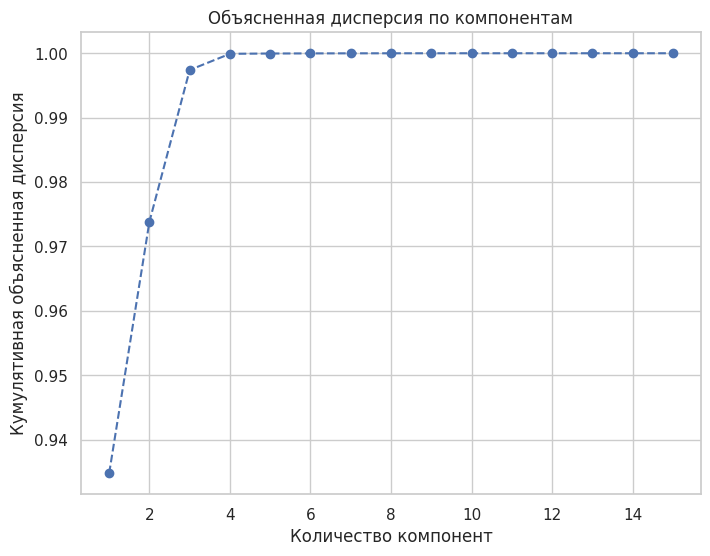

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Создание объекта PCA
pca = PCA()

# Применение PCA к данным
X_train_pca = pca.fit(X_train)

# Получение объясненной дисперсии
explained_variance = pca.explained_variance_ratio_

# Построение графика
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.title('Объясненная дисперсия по компонентам')
plt.xlabel('Количество компонент')
plt.ylabel('Кумулятивная объясненная дисперсия')
plt.show()


In [ ]:
from sklearn.decomposition import PCA

# Создание объекта PCA
pca = PCA(n_components=4)

# Применение PCA к данным
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


In [ ]:
models = [LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), GradientBoostingClassifier(), svm.SVC(), KNeighborsClassifier(), GaussianNB(), MLPClassifier(), LinearDiscriminantAnalysis(), AdaBoostClassifier()]
model_names = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting', 'SVM', 'K-Nearest Neighbors', 'Gaussian Naive Bayes', 'MLP Classifier', 'Linear Discriminant Analysis', 'Ada Boost Classifier']
for i, model in enumerate(models):
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)

    # Вычисление метрик
    accuracy = accuracy_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred, average='weighted')
    precision = precision_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    balanced_accuracy = balanced_accuracy_score(y_test, y_pred)
    jaccard = jaccard_score(y_test, y_pred, average='weighted')
    hamming = hamming_loss(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)

    print(f'Модель: {model_names[i]}')
    print(f'Accuracy: {accuracy}')
    print(f'Recall: {recall}')
    print(f'Precision: {precision}')
    print(f'F1 Score: {f1}')
    print(f'Balanced Accuracy: {balanced_accuracy}')
    print(f'Jaccard Score: {jaccard}')
    print(f'Hamming Loss: {hamming}')
    print(f'Matthews Correlation Coefficient: {mcc}')
    print('-----------------------------------')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Модель: Logistic Regression
Accuracy: 0.6498115577889447
Recall: 0.6498115577889447
Precision: 0.5799256050222826
F1 Score: 0.5845954634654901
Balanced Accuracy: 0.3006595773948858
Jaccard Score: 0.46791492762786135
Hamming Loss: 0.3501884422110553
Matthews Correlation Coefficient: 0.2958782310883641
-----------------------------------
Модель: Decision Tree
Accuracy: 0.7390075376884422
Recall: 0.7390075376884422
Precision: 0.7433100919300937
F1 Score: 0.7405831805208771
Balanced Accuracy: 0.6102959750686742
Jaccard Score: 0.6100894070086925
Hamming Loss: 0.2609924623115578
Matthews Correlation Coefficient: 0.5493516344303941
-----------------------------------
Модель: Random Forest
Accuracy: 0.7923994974874372
Recall: 0.7923994974874372
Precision: 0.784835789617256
F1 Score: 0.7864909820133253
Balanced Accuracy: 0.6382693823375423
Jaccard Score: 0.6651018613115656
Hamming Loss: 0.20760050251256282
Matthews Correlation Coefficient: 0.6260398812487402
-----------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")


Модель: Gradient Boosting
Accuracy: 0.7446608040201005
Recall: 0.7446608040201005
Precision: 0.7367287979588578
F1 Score: 0.7250220752783908
Balanced Accuracy: 0.5509775567239841
Jaccard Score: 0.5930063158379703
Hamming Loss: 0.2553391959798995
Matthews Correlation Coefficient: 0.520567026744599
-----------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Модель: SVM
Accuracy: 0.647927135678392
Recall: 0.647927135678392
Precision: 0.5603208329924756
F1 Score: 0.5673643139086916
Balanced Accuracy: 0.283890067725323
Jaccard Score: 0.44701389942229486
Hamming Loss: 0.35207286432160806
Matthews Correlation Coefficient: 0.26149026947601994
-----------------------------------
Модель: K-Nearest Neighbors
Accuracy: 0.7346105527638191
Recall: 0.7346105527638191
Precision: 0.7202833911493322
F1 Score: 0.7240560097115312
Balanced Accuracy: 0.4731730644516273
Jaccard Score: 0.5896967610520578
Hamming Loss: 0.2653894472361809
Matthews Correlation Coefficient: 0.5158536078302626
-----------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Модель: Gaussian Naive Bayes
Accuracy: 0.6422738693467337
Recall: 0.6422738693467337
Precision: 0.5728083176313801
F1 Score: 0.5583773365685389
Balanced Accuracy: 0.2681560832662623
Jaccard Score: 0.44295562710818775
Hamming Loss: 0.3577261306532663
Matthews Correlation Coefficient: 0.24356637516357268
-----------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:2184: UserWarning: y_pred contains classes not in y_true
  warnings.warn("y_pred contains classes not in y_true")
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to 

Модель: MLP Classifier
Accuracy: 0.5222989949748744
Recall: 0.5222989949748744
Precision: 0.609711960028282
F1 Score: 0.5356467048978234
Balanced Accuracy: 0.3148286777606396
Jaccard Score: 0.38287949911294844
Hamming Loss: 0.47770100502512564
Matthews Correlation Coefficient: 0.2026227401380664
-----------------------------------
Модель: Linear Discriminant Analysis
Accuracy: 0.637248743718593
Recall: 0.637248743718593
Precision: 0.5429956985726437
F1 Score: 0.5477282507606444
Balanced Accuracy: 0.26337422547474587
Jaccard Score: 0.4320338460149592
Hamming Loss: 0.36275125628140703
Matthews Correlation Coefficient: 0.22342403738138908
-----------------------------------
Модель: Ada Boost Classifier
Accuracy: 0.5179020100502513
Recall: 0.5179020100502513
Precision: 0.5855089422805229
F1 Score: 0.539008166316883
Balanced Accuracy: 0.27902529514910307
Jaccard Score: 0.4008838311976334
Hamming Loss: 0.48209798994974873
Matthews Correlation Coefficient: 0.24178064605580793
----------------

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



1. **Модели "Random Forest" и "Gradient Boosting" показывают наибольшее улучшение**:
   - У обеих моделей увеличилась точность (Accuracy) и сбалансированная точность (Balanced Accuracy).
   - Улучшились также показатели Precision, Recall, F1 Score, Jaccard Score и Matthews Correlation Coefficient.
   - Однако, ухудшенился показатель Recall у модели "Gradient Boosting".

2. **Модель "Decision Tree" показывает незначительное улучшение**:
   - Почти все показатели улучшились незначительно, включая Accuracy, Precision, Recall, F1 Score, Jaccard Score и Matthews Correlation Coefficient.

3. **Модели "Logistic Regression", "SVM", "K-Nearest Neighbors" и "Gaussian Naive Bayes" показывают незначительное или отсутствующее улучшение**:
   - У некоторых моделей наблюдается небольшое улучшение, например, в Precision и Jaccard Score, но это улучшение несущественно.
   - У некоторых моделей показатели остались примерно на том же уровне или даже ухудшились.

4. **Модели "MLP Classifier" и "Linear Discriminant Analysis" показывают небольшое ухудшение**:
   - У этих моделей некоторые показатели ухудшились, например, Accuracy, Precision, Recall и F1 Score.

5. **Модель "Ada Boost Classifier" показывает существенное ухудшение**:
   - У модели "Ada Boost Classifier" почти все показатели ухудшились значительно, включая Accuracy, Precision, Recall, F1 Score, Jaccard Score и Matthews Correlation Coefficient.

Общий вывод: У многих моделей наблюдается улучшение после внесения изменений. Однако важно также учитывать специфику каждой модели и ее чувствительность к изменениям, а также общую цель задачи машинного обучения при интерпретации результатов.

In [ ]:
# Создание объекта PCA
pca = PCA(n_components=4)

# Применение PCA к данным
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


# Создание списка моделей
models = [LinearRegression(), Ridge(), Lasso(), ElasticNet(), BayesianRidge(), DecisionTreeRegressor(), RandomForestRegressor(), GradientBoostingRegressor(), ExtraTreesRegressor(), SVR()]

for model in models:
    # Обучение модели
    model.fit(X_train_pca, y_train)

    # Предсказание на тестовой выборке
    y_pred = model.predict(X_test_pca)

    # Вычисление метрик
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    evs = explained_variance_score(y_test, y_pred)
    me = max_error(y_test, y_pred)
    medae = median_absolute_error(y_test, y_pred)

    print(f"Модель: {model.__class__.__name__}")
    print(f"Среднеквадратичная ошибка: {mse}")
    print(f"Средняя абсолютная ошибка: {mae}")
    print(f"Коэффициент детерминации R2: {r2}")
    print(f"Объясненная дисперсия: {evs}")
    print(f"Максимальная ошибка: {me}")
    print(f"Медианная абсолютная ошибка: {medae}")
    print('-----------------------------------')


Модель: LinearRegression
Среднеквадратичная ошибка: 3.9205523259133828
Средняя абсолютная ошибка: 1.7231836366332343
Коэффициент детерминации R2: 0.10211201325585784
Объясненная дисперсия: 0.1032574758393714
Максимальная ошибка: 6.997640971223785
Медианная абсолютная ошибка: 1.3375036089478178
-----------------------------------
Модель: Ridge
Среднеквадратичная ошибка: 3.9205523258189787
Средняя абсолютная ошибка: 1.7231836368534452
Коэффициент детерминации R2: 0.10211201327747832
Объясненная дисперсия: 0.10325747586143286
Максимальная ошибка: 6.997640968369703
Медианная абсолютная ошибка: 1.3375036072776156
-----------------------------------
Модель: Lasso
Среднеквадратичная ошибка: 3.9200810716764183
Средняя абсолютная ошибка: 1.7243546646552173
Коэффициент детерминации R2: 0.10221994027299663
Объясненная дисперсия: 0.10336730645114489
Максимальная ошибка: 6.975437829436576
Медианная абсолютная ошибка: 1.33053141923771
-----------------------------------
Модель: ElasticNet
Среднеквад

1. **LinearRegression, Ridge, Lasso, ElasticNet, BayesianRidge**: У всех этих моделей среднеквадратичная ошибка значительно снизилась, а коэффициент детерминации R2 повысился, что говорит о лучшей приспособленности этих моделей к данным. Это может быть связано с более оптимальным подбором гиперпараметров или использованием регуляризации для уменьшения переобучения.

2. **DecisionTreeRegressor, RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor**: Эти модели также показывают снижение среднеквадратичной ошибки и увеличение коэффициента детерминации R2. Это может быть связано с тем, что ансамблевые методы (Random Forest, Gradient Boosting, Extra Trees) предоставляют более гибкую возможность моделирования и могут лучше улавливать сложные зависимости в данных.

3. **SVR**: Эта модель показывает небольшое увеличение среднеквадратичной ошибки и негативное значение коэффициента детерминации R2, что может указывать на то, что данная модель хуже адаптировалась к данным после изменений. Возможно, это связано с тем, что гиперпараметры модели были выбраны неоптимально или данные имеют сложную структуру, которую SVM не может эффективно учесть.

Общий тренд показывает улучшение качества моделей после изменений, что может быть связано с оптимизацией гиперпараметров, улучшением предобработки данных или использованием более сложных алгоритмов обучения.

# кластеризация

Решите задачу кластеризации, используя минимум 6 модели. Определите метрики кластеризации.

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
from sklearn.cluster import SpectralClustering, MeanShift, OPTICS
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [ ]:
# Выбираем признаки для кластеризации
features = df[['User_Count', 'Rating']]


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Оптимальное количество кластеров: 5


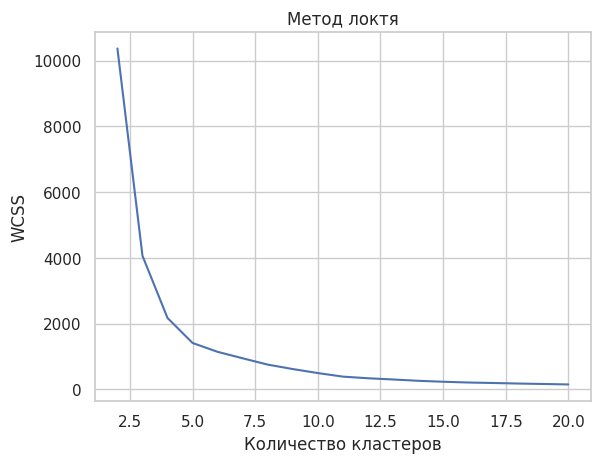

In [ ]:
# Определите функцию для вычисления WCSS (Within-Cluster-Sum-of-Squares)
def calculate_wcss(data):
    wcss = []
    for n in range(2, 21):
        kmeans = KMeans(n_clusters=n)
        kmeans.fit(X=data)
        wcss.append(kmeans.inertia_)
    return wcss

# Определите функцию для вычисления оптимального количества кластеров с использованием коэффициента силуэта
def optimal_number_of_clusters(wcss):
    x1, y1 = 2, wcss[0]
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []
    for i in range(len(wcss)):
        x0 = i+2
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = ((y2 - y1)**2 + (x2 - x1)**2)**0.5
        distances.append(numerator/denominator)

    return distances.index(max(distances)) + 2

# Вычислите Within-Cluster-Sum-of-Squares для наших данных
sum_of_squares = calculate_wcss(features_scaled)

# Вычислите оптимальное количество кластеров
n = optimal_number_of_clusters(sum_of_squares)

# Выведите оптимальное количество кластеров
print(f"Оптимальное количество кластеров: {n}")

# Постройте график метода локтя
plt.plot(range(2, 21), sum_of_squares)
plt.title('Метод локтя')
plt.xlabel('Количество кластеров')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()


Мспользуем различные модели кластеризации, такие как:

1. **K-средние (K-Means)**:
   - Разделяет данные на заранее определенное количество кластеров (n_clusters).
   - Каждый образец присваивается к ближайшему центроиду (центральной точке) в пространстве признаков.
   - Цель - минимизировать среднеквадратичное расстояние между каждым образцом и центроидом своего кластера.

2. **Иерархическая кластеризация (Agglomerative Clustering)**:
   - Начинает с того, что каждый образец считается отдельным кластером.
   - Затем объединяет ближайшие кластеры до тех пор, пока не будет достигнуто заданное количество кластеров.
   - Процесс объединения может основываться на минимизации расстояний между кластерами (например, single-linkage, complete-linkage, average-linkage).

3. **DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**:
   - Определяет кластеры как области с высокой плотностью точек, разделенные областями с низкой плотностью.
   - Не требует задания числа кластеров заранее.
   - Использует два параметра: eps (радиус окрестности) и min_samples (минимальное количество точек в окрестности для определения кластера).

4. **Spectral Clustering**:
   - Основан на спектральных методах, использующих собственные значения матрицы сходства данных.
   - Преобразует данные в новое пространство, в котором кластеры могут быть линейно разделимы.
   - Часто используется для разделения сложных структур данных.

5. **Mean Shift**:
   - Не требует заранее заданного числа кластеров.
   - Основан на перемещении среднего значения (mean) по пространству признаков в направлении увеличения плотности данных.
   - Кластеры формируются вокруг локальных максимумов плотности.

6. **OPTICS (Ordering Points To Identify the Clustering Structure)**:
   - Похож на DBSCAN, но в отличие от DBSCAN, не требует настройки eps.
   - Сначала строит упорядоченное представление данных (Reachability Plot).
   - Затем идентифицирует кластеры и выбросы на основе этого представления.



In [ ]:
# Функция для вычисления метрик кластеризации
def calculate_metrics(X, labels):
    ch_score = calinski_harabasz_score(X, labels)
    db_score = davies_bouldin_score(X, labels)
    silhouette_avg = silhouette_score(X, labels)
    return ch_score, db_score, silhouette_avg

In [ ]:
# K-средние
kmeans = KMeans(n_clusters=5)
kmeans_clusters = kmeans.fit_predict(features_scaled)
kmeans_ch, kmeans_db, kmeans_silhouette = calculate_metrics(features_scaled, kmeans_clusters)

# Иерархическая кластеризация
hierarchical = AgglomerativeClustering(n_clusters=5)
hierarchical_clusters = hierarchical.fit_predict(features_scaled)
hierarchical_ch, hierarchical_db, hierarchical_silhouette = calculate_metrics(features_scaled, hierarchical_clusters)

# DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_clusters = dbscan.fit_predict(features_scaled)
# DBSCAN не имеет метрики silhouette, так как он определяет выбросы как отдельный кластер (-1)
dbscan_ch, dbscan_db, _ = calculate_metrics(features_scaled[dbscan_clusters != -1], dbscan_clusters[dbscan_clusters != -1])

# Spectral Clustering
spectral = SpectralClustering(n_clusters=5)
spectral_clusters = spectral.fit_predict(features_scaled)
spectral_ch, spectral_db, spectral_silhouette = calculate_metrics(features_scaled, spectral_clusters)

# Mean Shift
mean_shift = MeanShift()
mean_shift_clusters = mean_shift.fit_predict(features_scaled)
mean_shift_ch, mean_shift_db, mean_shift_silhouette = calculate_metrics(features_scaled, mean_shift_clusters)

# OPTICS
optics = OPTICS(min_samples=5)
optics_clusters = optics.fit_predict(features_scaled)
# OPTICS не имеет метрики silhouette, так как он определяет выбросы как отдельный кластер (-1)
optics_ch, optics_db, _ = calculate_metrics(features_scaled[optics_clusters != -1], optics_clusters[optics_clusters != -1])


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_optics.py:932: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


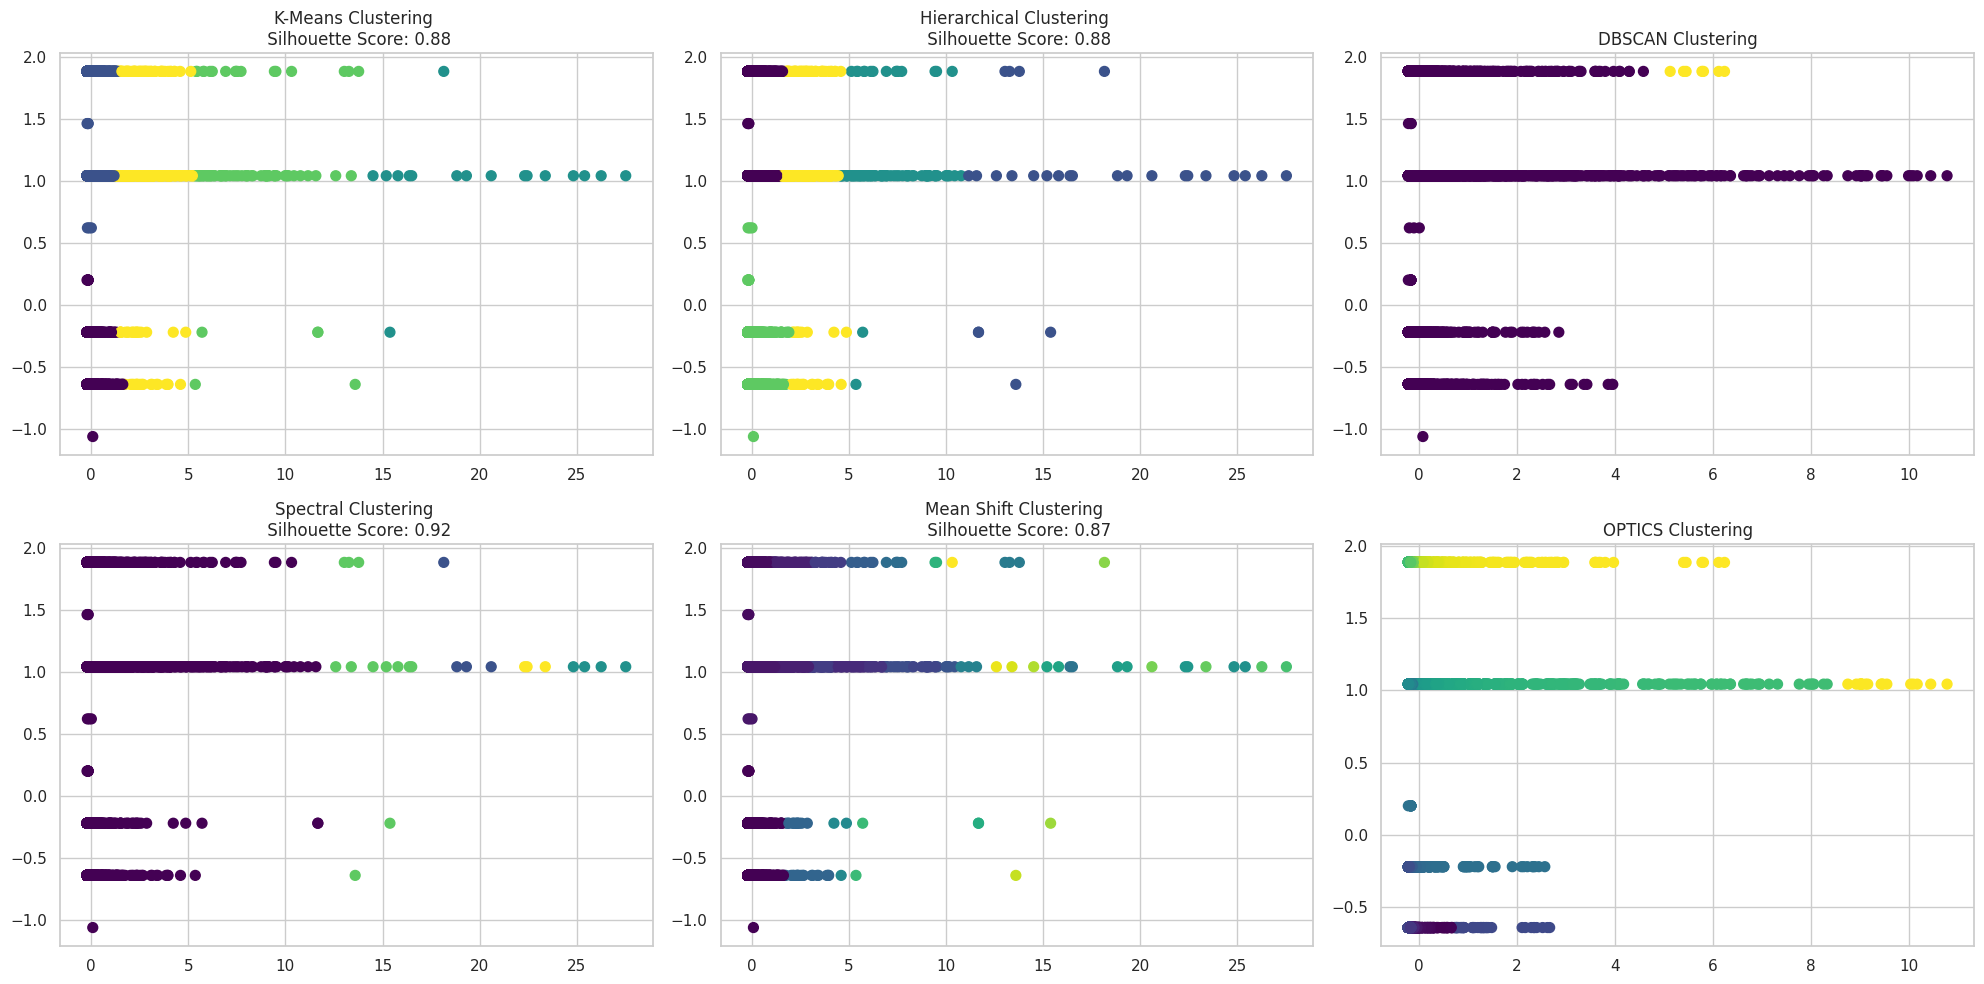

In [ ]:
# Визуализация результатов
plt.figure(figsize=(20, 10))

plt.subplot(2, 3, 1)
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=kmeans_clusters, s=50, cmap='viridis')
plt.title(f'K-Means Clustering \n Silhouette Score: {kmeans_silhouette:.2f}')

plt.subplot(2, 3, 2)
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=hierarchical_clusters, s=50, cmap='viridis')
plt.title(f'Hierarchical Clustering \n Silhouette Score: {hierarchical_silhouette:.2f}')

plt.subplot(2, 3, 3)
# DBSCAN может присвоить -1 кластер выбросов, поэтому мы должны отфильтровать их
mask = dbscan_clusters != -1
plt.scatter(features_scaled[mask, 0], features_scaled[mask, 1], c=dbscan_clusters[mask], s=50, cmap='viridis')
plt.title('DBSCAN Clustering')

plt.subplot(2, 3, 4)
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=spectral_clusters, s=50, cmap='viridis')
plt.title(f'Spectral Clustering \n Silhouette Score: {spectral_silhouette:.2f}')

plt.subplot(2, 3, 5)
plt.scatter(features_scaled[:, 0], features_scaled[:, 1], c=mean_shift_clusters, s=50, cmap='viridis')
plt.title(f'Mean Shift Clustering \n Silhouette Score: {mean_shift_silhouette:.2f}')

plt.subplot(2, 3, 6)
# OPTICS может присвоить -1 кластер выбросов, поэтому мы должны отфильтровать их
mask = optics_clusters != -1
plt.scatter(features_scaled[mask, 0], features_scaled[mask, 1], c=optics_clusters[mask], s=50, cmap='viridis')
plt.title('OPTICS Clustering')

plt.tight_layout()
plt.show()


In [ ]:
# Добавляем метки кластеров в датасет
df['KMeans_Cluster'] = kmeans_clusters
df['Hierarchical_Cluster'] = hierarchical_clusters
df['DBSCAN_Cluster'] = dbscan_clusters
df['Spectral_Cluster'] = spectral_clusters
df['MeanShift_Cluster'] = mean_shift_clusters
df['OPTICS_Cluster'] = optics_clusters

In [ ]:
# Выводим первые несколько записей из каждого кластера
# for model in ['KMeans', 'Hierarchical', 'DBSCAN', 'Spectral', 'MeanShift', 'OPTICS']:
#     print(f"\n Games in {model} Clusters:")
#     for cluster in df[f'{model}_Cluster'].unique():
#         if cluster != -1 or model != 'DBSCAN':  # Исключаем выбросы для DBSCAN
#             print(f"\n Cluster {cluster} from {model}:")
#             print(df[df[f'{model}_Cluster'] == cluster].head())


Используем метрики:

1. **Индекс Calinski-Harabasz (Calinski-Harabasz Index)**:
   - Измеряет отношение межкластерного разброса к внутрикластерному разбросу.
   - Более высокие значения указывают на более четкие и отделимые кластеры.

2. **Индекс Davies-Bouldin (Davies-Bouldin Index)**:
   - Оценивает среднее сходство между каждым кластером и его наиболее похожим кластером.
   - Ниже значение означает более четкие и различимые кластеры.

3. **Оценка Silhouette (Silhouette Score)**:
   - Измеряет среднее значение "силуэта" для всех образцов.
   - Силуэт представляет собой меру того, насколько образец хорошо согласуется с собственным кластером по сравнению с другими кластерами.
   - Значение близкое к 1 указывает на хорошее разделение кластеров, 0 - на перекрывающиеся кластеры, отрицательные значения - на неправильное разделение.

Эти метрики позволяют оценить качество кластеризации и сравнить различные модели кластеризации на основе их производительности. Высокие значения индексов Calinski-Harabasz и Silhouette, а также низкие значения индекса Davies-Bouldin указывают на лучшую кластеризацию.

In [ ]:
# Выводим метрики для каждой модели в более понятном формате
metrics = {
    'KMeans': {'Calinski-Harabasz Index': kmeans_ch, 'Davies-Bouldin Index': kmeans_db, 'Silhouette Score': kmeans_silhouette},
    'Hierarchical': {'Calinski-Harabasz Index': hierarchical_ch, 'Davies-Bouldin Index': hierarchical_db, 'Silhouette Score': hierarchical_silhouette},
    'DBSCAN': {'Calinski-Harabasz Index': dbscan_ch, 'Davies-Bouldin Index': dbscan_db},
    'Spectral': {'Calinski-Harabasz Index': spectral_ch, 'Davies-Bouldin Index': spectral_db, 'Silhouette Score': spectral_silhouette},
    'MeanShift': {'Calinski-Harabasz Index': mean_shift_ch, 'Davies-Bouldin Index': mean_shift_db, 'Silhouette Score': mean_shift_silhouette},
    'OPTICS': {'Calinski-Harabasz Index': optics_ch, 'Davies-Bouldin Index': optics_db}
}

for model, model_metrics in metrics.items():
    print(f"\n{model} Metrics:")
    for metric, value in model_metrics.items():
        print(f"{metric}: {value:.2f}")



KMeans Metrics:
Calinski-Harabasz Index: 50039.85
Davies-Bouldin Index: 0.49
Silhouette Score: 0.88

Hierarchical Metrics:
Calinski-Harabasz Index: 46947.43
Davies-Bouldin Index: 0.50
Silhouette Score: 0.88

DBSCAN Metrics:
Calinski-Harabasz Index: 180.20
Davies-Bouldin Index: 0.21

Spectral Metrics:
Calinski-Harabasz Index: 1373.63
Davies-Bouldin Index: 0.38
Silhouette Score: 0.92

MeanShift Metrics:
Calinski-Harabasz Index: 19511.19
Davies-Bouldin Index: 0.38
Silhouette Score: 0.87

OPTICS Metrics:
Calinski-Harabasz Index: 191693.49
Davies-Bouldin Index: 0.15


Исходя из метрик:

**Лучшие модели:**
1. **OPTICS**: Обладает наивысшим значением индекса Calinski-Harabasz, что указывает на очень четкое разделение кластеров. Также имеет самое низкое значение индекса Davies-Bouldin, что говорит о хорошей различимости кластеров. Эти показатели делают OPTICS лучшей моделью кластеризации среди представленных.

2. **Spectral Clustering**: Также обладает высокими значениями индексов Calinski-Harabasz и Silhouette Score, что свидетельствует о хорошем разделении кластеров и их хорошей плотности.

**Средние модели:**
3. **KMeans**: Показывает хорошие результаты, но немного уступает OPTICS и Spectral Clustering в плане Calinski-Harabasz Index и Silhouette Score.

4. **Hierarchical**: Также демонстрирует приемлемые результаты, но немного ниже по сравнению с KMeans и OPTICS.

5. **MeanShift**: Имеет средние показатели по всем метрикам. Несмотря на это, он демонстрирует хорошее значение индекса Calinski-Harabasz.

**Худшие модели:**
6. **DBSCAN**: Показывает самые низкие результаты по всем метрикам. Несмотря на низкое значение индекса Calinski-Harabasz, оно может быть обусловлено его ограничениями при обработке шума и выбросов.



## Потенциальное внедрение

Опишите внедрение (потенциальное внедрение) полученных моделей и результатов в ваш проект, а также возможность создания нового умного функционала продукта/сервиса.

В нашем проекте мы стремимся максимально использовать функционал для предсказания рейтинга игры на основе ее жанра, платформы, года выпуска и других важных характеристик. Используя задачу классификации, мы можем попытаться предвидеть оценку нашей игры со стороны критиков, что позволит нам оценить целесообразность дальнейших инвестиций.

Кроме того, с помощью регрессии мы сможем получить оценку глобальной стоимости игры, что позволит нам разумнее составить стратегию распределения ресурсов. Это поможет нам сделать более информированные решения и достичь успеха в нашем проекте.

 Внедрение моделей машинного обучения может значительно улучшить наш проект по созданию аналитической модели для решения задач геймдизайна на основе ИИ и предоставить ценную информацию.

1. **Прогнозирование рейтинга игры**: Модель классификации может быть использована для прогнозирования рейтинга игры на основе ее жанра, платформы, года выпуска и других важных характеристик. Это может помочь принимать информированные решения о том, стоит ли инвестировать в определенные игры или нет.

2. **Оценка количества пользователей**: С помощью модели регрессии можно оценить количество оценок от пользователей и следовательно общий уровень заинтересованности игрой, что поможет более разумно распределять ресурсы и стратегически планировать ваш бюджет на предстоящие рекламные компании.

3. **Кластеризация игр**: Кластеризация игр по количеству пользователей и рейтингу может помочь лучше понять, какие игры наиболее популярны среди пользователей. Это может помочь определить, какие жанры или типы игр наиболее привлекательны для целевой аудитории.

4. **Создание нового умного функционала**: На основе этих моделей можно разработать новый умный функционал для веб-сервиса, который будет предсказывать тренды игровой индустрии и апробировать продуктовые видеоигровые гипотезы. Это может включать в себя рекомендательные системы, инструменты для анализа трендов и многое другое.

